In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pivottablejs import pivot_ui

#import train_test split
from sklearn.model_selection import GridSearchCV, train_test_split

#import regression models
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

#import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, balanced_accuracy_score

#import pipeline and transformers
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer

#import preprocessors 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

from sklearn.metrics import explained_variance_score
import time

from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import RFECV

from tabulate import tabulate
from functools import partial
rmse = partial(mean_squared_error, squared=False)

#import train_test split
from sklearn.model_selection import train_test_split

In [2]:
data = r"C:\Users\bolaj\Desktop\Desk\Data\Trip Prediction\New_York_City_Trips.csv"

In [3]:
df = pd.read_csv(data)

In [4]:
df.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,tolls_amount,fare_amount,total_amount
0,2009-09-16 20:45:23 UTC,-73.987603,40.728781,-73.998216,40.677855,1,6.10,0.0,16.9,17.40
1,2012-03-04 00:57:00 UTC,-74.004595,40.741882,-73.950250,40.787300,1,5.53,0.0,16.1,20.42
2,2014-04-11 00:16:56 UTC,-73.995064,40.721451,-74.038159,40.616236,2,11.10,0.0,31.5,41.50
3,2015-05-19 09:00:10 UTC,-73.945427,40.774059,-74.002724,40.742313,1,4.80,0.0,19.0,19.80
4,2010-05-22 12:30:55 UTC,-73.947361,40.775829,-73.993657,40.721529,2,5.70,0.0,17.7,18.20


In [5]:
df.isna().sum()

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
trip_distance        0
tolls_amount         0
fare_amount          0
total_amount         0
dtype: int64

In [6]:
df.shape

(10789, 10)

In [7]:
df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,tolls_amount,fare_amount,total_amount
count,10789.000000,10789.000000,10789.000000,10789.000000,10789.000000,10789.000000,10789.000000,10789.000000,10789.000000
mean,-72.577466,39.988518,-72.577056,39.991694,1.648716,2.837068,0.228359,11.165192,13.280564
std,10.071200,5.523964,10.068592,5.510504,1.282589,3.319036,1.144977,9.444876,11.267704
min,-75.336579,0.000000,-75.381754,0.000000,0.000000,0.000000,0.000000,2.500000,2.500000
25%,-73.992172,40.735837,-73.991581,40.734267,1.000000,1.010000,0.000000,6.000000,7.200000
50%,-73.981871,40.753200,-73.980401,40.752872,1.000000,1.750000,0.000000,8.500000,10.000000
75%,-73.967330,40.767309,-73.964102,40.767484,2.000000,3.110000,0.000000,12.500000,14.600000
max,0.000000,41.366138,0.000000,41.366138,6.000000,42.800000,16.000000,194.750000,204.750000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10789 entries, 0 to 10788
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pickup_datetime    10789 non-null  object 
 1   pickup_longitude   10789 non-null  float64
 2   pickup_latitude    10789 non-null  float64
 3   dropoff_longitude  10789 non-null  float64
 4   dropoff_latitude   10789 non-null  float64
 5   passenger_count    10789 non-null  int64  
 6   trip_distance      10789 non-null  float64
 7   tolls_amount       10789 non-null  float64
 8   fare_amount        10789 non-null  float64
 9   total_amount       10789 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 843.0+ KB


<Axes: >

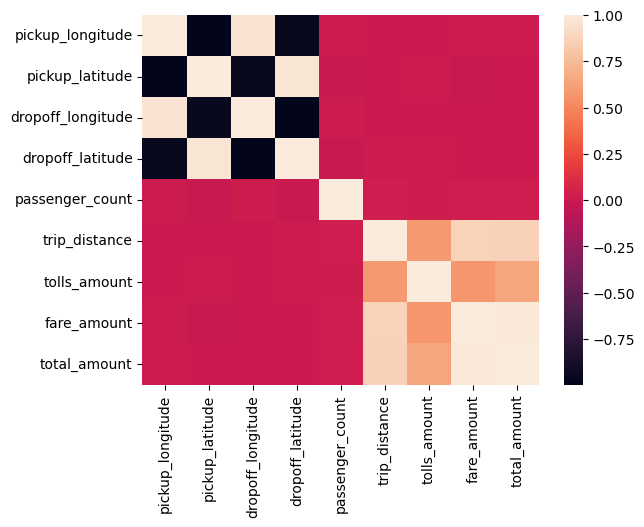

In [9]:
sns.heatmap(df.corr(numeric_only=True))

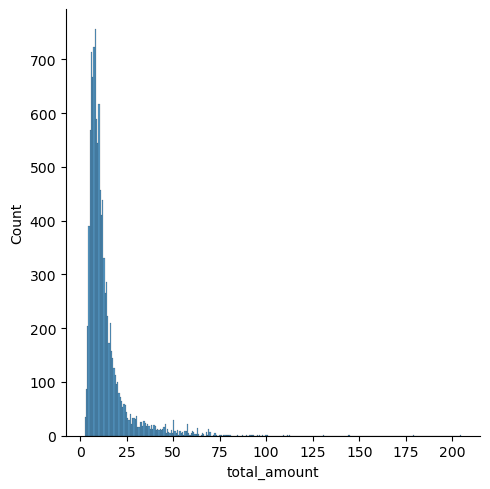

In [10]:
sns.displot(df['total_amount'],kind='hist')

<Axes: xlabel='passenger_count', ylabel='count'>

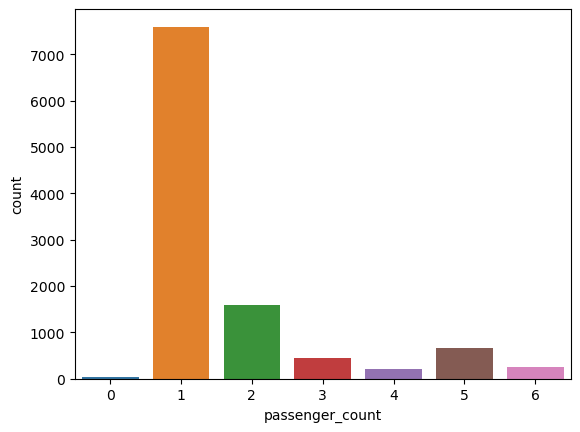

In [11]:
sns.countplot(x = 'passenger_count', data=df)

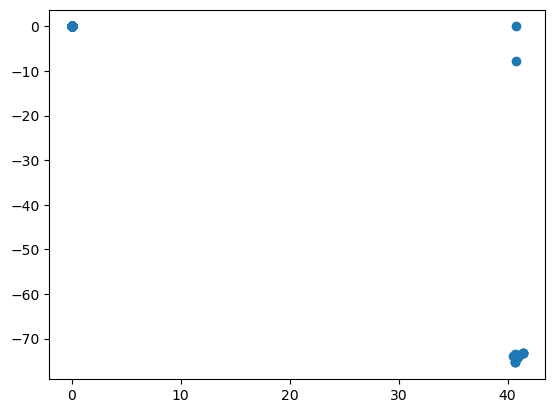

In [12]:
x = df['pickup_latitude']
y = df['pickup_longitude']

plt.scatter(x, y)
plt.show()

In [13]:
# Convert the 'Date' column to datetime
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [14]:
df.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,tolls_amount,fare_amount,total_amount
0,2009-09-16 20:45:23+00:00,-73.987603,40.728781,-73.998216,40.677855,1,6.10,0.0,16.9,17.40
1,2012-03-04 00:57:00+00:00,-74.004595,40.741882,-73.950250,40.787300,1,5.53,0.0,16.1,20.42
2,2014-04-11 00:16:56+00:00,-73.995064,40.721451,-74.038159,40.616236,2,11.10,0.0,31.5,41.50
3,2015-05-19 09:00:10+00:00,-73.945427,40.774059,-74.002724,40.742313,1,4.80,0.0,19.0,19.80
4,2010-05-22 12:30:55+00:00,-73.947361,40.775829,-73.993657,40.721529,2,5.70,0.0,17.7,18.20


In [15]:
# Extract year, month, day, and time as separate features
df['Year'] = df['pickup_datetime'].dt.year
df['Month'] = df['pickup_datetime'].dt.month
df['Day'] = df['pickup_datetime'].dt.day
df['Time'] = df['pickup_datetime'].dt.time

In [16]:
df.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,tolls_amount,fare_amount,total_amount,Year,Month,Day,Time
0,2009-09-16 20:45:23+00:00,-73.987603,40.728781,-73.998216,40.677855,1,6.10,0.0,16.9,17.40,2009,9,16,20:45:23
1,2012-03-04 00:57:00+00:00,-74.004595,40.741882,-73.950250,40.787300,1,5.53,0.0,16.1,20.42,2012,3,4,00:57:00
2,2014-04-11 00:16:56+00:00,-73.995064,40.721451,-74.038159,40.616236,2,11.10,0.0,31.5,41.50,2014,4,11,00:16:56
3,2015-05-19 09:00:10+00:00,-73.945427,40.774059,-74.002724,40.742313,1,4.80,0.0,19.0,19.80,2015,5,19,09:00:10
4,2010-05-22 12:30:55+00:00,-73.947361,40.775829,-73.993657,40.721529,2,5.70,0.0,17.7,18.20,2010,5,22,12:30:55


In [17]:
df.drop('pickup_datetime',axis=1,inplace=True)

In [18]:
df.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,tolls_amount,fare_amount,total_amount,Year,Month,Day,Time
0,-73.987603,40.728781,-73.998216,40.677855,1,6.10,0.0,16.9,17.40,2009,9,16,20:45:23
1,-74.004595,40.741882,-73.950250,40.787300,1,5.53,0.0,16.1,20.42,2012,3,4,00:57:00
2,-73.995064,40.721451,-74.038159,40.616236,2,11.10,0.0,31.5,41.50,2014,4,11,00:16:56
3,-73.945427,40.774059,-74.002724,40.742313,1,4.80,0.0,19.0,19.80,2015,5,19,09:00:10
4,-73.947361,40.775829,-73.993657,40.721529,2,5.70,0.0,17.7,18.20,2010,5,22,12:30:55


In [19]:
average_total_amount_by_year = df.groupby('Year')['total_amount'].mean()
average_total_amount_by_year

Year
2009    11.253491
2010    11.927098
2011    11.943885
2012    13.042425
2013    15.343770
2014    15.228329
2015    14.821718
Name: total_amount, dtype: float64

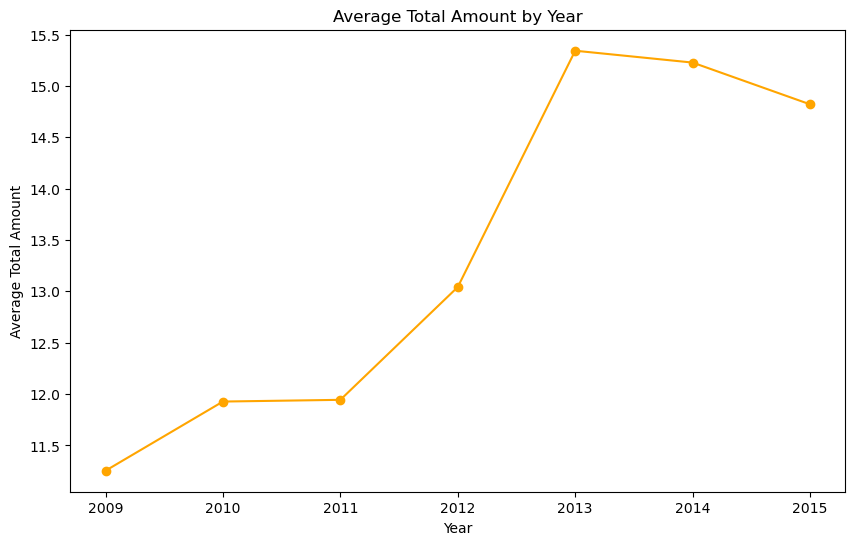

In [20]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(average_total_amount_by_year.index, average_total_amount_by_year.values, marker='o', linestyle='-', color='orange')
plt.title('Average Total Amount by Year')
plt.xlabel('Year')
plt.ylabel('Average Total Amount')
plt.xticks(average_total_amount_by_year.index)  # Ensure all years are displayed on x-axis
plt.show()

In [21]:
average_total_amount_by_month= df.groupby('Month')['total_amount'].mean()
average_total_amount_by_month

Month
1     13.378805
2     12.562989
3     13.215494
4     13.231237
5     13.557619
6     12.687542
7     12.765941
8     13.233899
9     12.315075
10    13.796302
11    13.551402
12    14.027874
Name: total_amount, dtype: float64

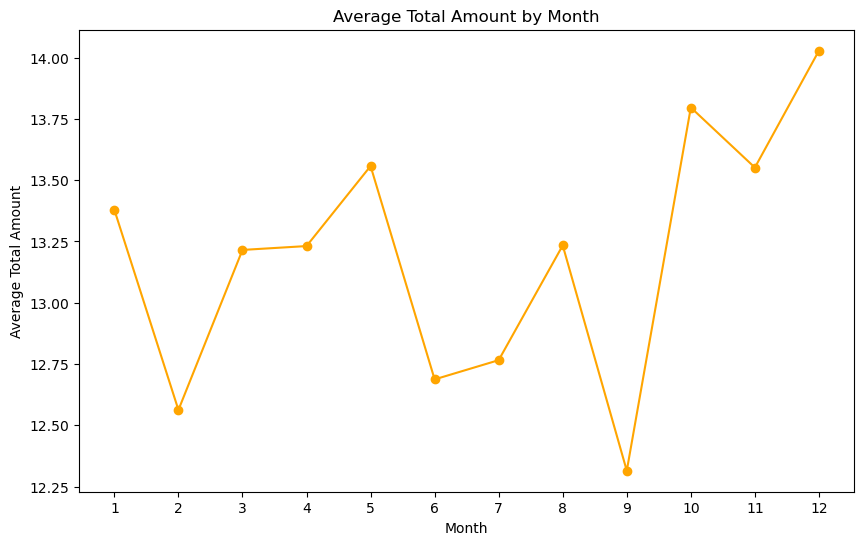

In [22]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(average_total_amount_by_month.index, average_total_amount_by_month.values, marker='o', linestyle='-', color='orange')
plt.title('Average Total Amount by Month')
plt.xlabel('Month')
plt.ylabel('Average Total Amount')
plt.xticks(average_total_amount_by_month.index)  # Ensure all years are displayed on x-axis
plt.show()

In [23]:
pivot_ui(df)

In [24]:
average= df.groupby('Month')[['total_amount','fare_amount']].mean()

In [25]:
average

,total_amount,fare_amount
Month,,
1,13.378805,11.274960
2,12.562989,10.231955
3,13.215494,11.127947
4,13.231237,11.181011
5,13.557619,11.430108
6,12.687542,10.545791
7,12.765941,10.944148
8,13.233899,11.203038
9,12.315075,10.668515


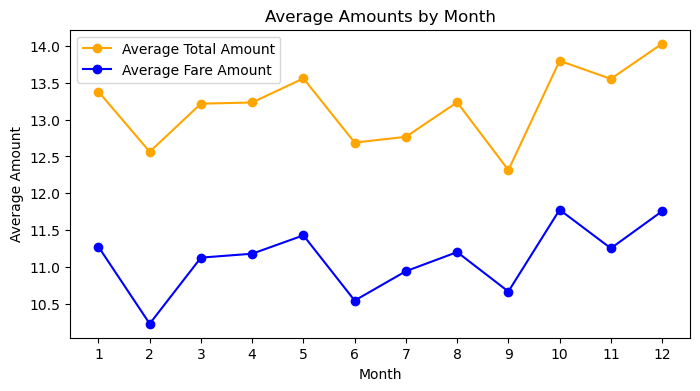

In [26]:
# Plotting
plt.figure(figsize=(8, 4))

# Plot average total_amount
plt.plot(average.index, average['total_amount'], marker='o', linestyle='-', color='orange', label='Average Total Amount')

# Plot average fare_amount
plt.plot(average.index, average['fare_amount'], marker='o', linestyle='-', color='blue', label='Average Fare Amount')

plt.title('Average Amounts by Month')
plt.xlabel('Month')
plt.ylabel('Average Amount')
plt.legend()  # Show legend
plt.xticks(range(1, 13))  # Ensure all months are displayed on x-axis
plt.show()

In [27]:
# Assuming 'Time' column is in the format 'HH:MM:SS'
df['Time'] = df['Time'].astype(str)  # Convert to string format
df['Time'] = pd.to_datetime(df['Time']).dt.hour

C:\Users\bolaj\AppData\Local\Temp\ipykernel_13812\336586042.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time']).dt.hour


In [28]:
average_Time= df.groupby('Time')[['total_amount','fare_amount']].mean()

In [29]:
df.columns

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'trip_distance', 'tolls_amount',
       'fare_amount', 'total_amount', 'Year', 'Month', 'Day', 'Time'],
      dtype='object')

In [30]:
df.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,tolls_amount,fare_amount,total_amount,Year,Month,Day,Time
0,-73.987603,40.728781,-73.998216,40.677855,1,6.10,0.0,16.9,17.40,2009,9,16,20
1,-74.004595,40.741882,-73.950250,40.787300,1,5.53,0.0,16.1,20.42,2012,3,4,0
2,-73.995064,40.721451,-74.038159,40.616236,2,11.10,0.0,31.5,41.50,2014,4,11,0
3,-73.945427,40.774059,-74.002724,40.742313,1,4.80,0.0,19.0,19.80,2015,5,19,9
4,-73.947361,40.775829,-73.993657,40.721529,2,5.70,0.0,17.7,18.20,2010,5,22,12


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10789 entries, 0 to 10788
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pickup_longitude   10789 non-null  float64
 1   pickup_latitude    10789 non-null  float64
 2   dropoff_longitude  10789 non-null  float64
 3   dropoff_latitude   10789 non-null  float64
 4   passenger_count    10789 non-null  int64  
 5   trip_distance      10789 non-null  float64
 6   tolls_amount       10789 non-null  float64
 7   fare_amount        10789 non-null  float64
 8   total_amount       10789 non-null  float64
 9   Year               10789 non-null  int32  
 10  Month              10789 non-null  int32  
 11  Day                10789 non-null  int32  
 12  Time               10789 non-null  int32  
dtypes: float64(8), int32(4), int64(1)
memory usage: 927.3 KB


In [32]:
df.isna().sum()

pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
trip_distance        0
tolls_amount         0
fare_amount          0
total_amount         0
Year                 0
Month                0
Day                  0
Time                 0
dtype: int64

In [33]:
X ,y = df.drop(['total_amount','fare_amount'],axis=1),df['total_amount']

In [34]:
# import sklearn
# print(sklearn.__version__)

In [35]:
# Set a random seed for reproducibility
random_seed = 42

X_train, X_test, y_train, y_test = train_test_split(
    X, y,test_size=0.4, train_size=0.6, random_state=random_seed)

In [36]:
X_train.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,tolls_amount,Year,Month,Day,Time
9259,-73.991109,40.750325,-73.989688,40.757052,1,0.7,0.0,2010,7,9,13
6757,-73.960872,40.766381,-73.959085,40.772571,1,4.5,0.0,2011,6,11,16
8786,-73.990736,40.761078,-73.920803,40.743254,2,4.8,0.0,2011,10,2,5
4151,-73.990852,40.747010,-73.978921,40.737079,1,1.4,0.0,2014,10,1,19
5144,-74.003882,40.725357,-74.010315,40.707825,1,1.6,0.0,2013,7,12,10


In [53]:
X_train.shape

(6473, 11)

In [37]:
y_train.head()

9259     5.40
6757    19.00
8786    17.64
4151    10.00
5144    13.20
Name: total_amount, dtype: float64

In [38]:
#numerical features excluding booleans and object to list 
numeric_features = X_train.select_dtypes(exclude=['bool', 'object','category']).columns.tolist()

In [39]:
len(numeric_features)

11

In [40]:
#setting up a pipeline for scaling the numerical features
numeric_transformer = Pipeline(
    steps=[ 
        ("scaler", StandardScaler())
    ]
).set_output(transform='pandas')
numeric_transformer

Pipeline(steps=[('scaler', StandardScaler())])

In [41]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features)
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
)
preprocessor.set_output(transform='pandas')

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['pickup_longitude', 'pickup_latitude',
                                  'dropoff_longitude', 'dropoff_latitude',
                                  'passenger_count', 'trip_distance',
                                  'tolls_amount', 'Year', 'Month', 'Day',
                                  'Time'])],
                  verbose_feature_names_out=False)

In [42]:
X_train.columns

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'trip_distance', 'tolls_amount',
       'Year', 'Month', 'Day', 'Time'],
      dtype='object')

In [43]:
X_train = preprocessor.fit_transform(X_train,y_train)

In [44]:
X_test=preprocessor.transform(X_test)

In [45]:
X_train.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,tolls_amount,Year,Month,Day,Time
9259,-0.138393,0.136067,-0.138901,0.137402,-0.506181,-0.640368,-0.19729,-0.959164,0.120312,-0.727006,-0.027346
6757,-0.135351,0.139012,-0.135832,0.140249,-0.506181,0.528647,-0.19729,-0.429595,-0.151134,-0.497136,0.432018
8786,-0.138356,0.138039,-0.131992,0.134871,0.270611,0.620938,-0.19729,-0.429595,0.934650,-1.531554,-1.252316
4151,-0.138368,0.135458,-0.137821,0.133739,-0.506181,-0.425023,-0.19729,1.159112,0.934650,-1.646489,0.891382
5144,-0.139679,0.131487,-0.140970,0.128373,-0.506181,-0.363496,-0.19729,0.629543,0.120312,-0.382200,-0.486710


In [46]:
# X_train[['numerical__LoanAmount','LoanAmount']]
X_train.columns

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'trip_distance', 'tolls_amount',
       'Year', 'Month', 'Day', 'Time'],
      dtype='object')

### Decision Tree

In [47]:
DTpipeline = Pipeline(
    steps=[
        ("DT", DecisionTreeRegressor()
        )
    ]
).set_output(transform='pandas')
DTpipeline

Pipeline(steps=[('DT', DecisionTreeRegressor())])

In [48]:
DTpipeline.fit(X_train, y_train)

Pipeline(steps=[('DT', DecisionTreeRegressor())])

In [49]:
DTpipeline.score(X_train, y_train), DTpipeline.score(X_test,y_test)

(1.0, 0.76019024679573)

In [50]:
# Predict the target values for the test data
y_pred_dt = DTpipeline.predict(X_test)
y_pred_dt

array([ 6.8,  8.2, 12. , ..., 11.5, 25.1, 18.9])

In [51]:
# Evaluating the model
dtmse = mean_squared_error(y_test, y_pred_dt)
dtmae = mean_absolute_error(y_test, y_pred_dt)
dtrmse = mean_squared_error(y_test, y_pred_dt, squared=False)
dtr2 = r2_score(y_test, y_pred_dt)

# Store evaluation metrics in a dictionary
DT_evaluation = {
    'Metric': ['Mean Squared Error', 'Mean Absolute Error', 'Root Mean Squared Error', 'R-squared Score'],
    'Value': [dtmse, dtmae, dtrmse, dtr2]
}

C:\Users\bolaj\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [52]:
# Display evaluation metrics in a table
print(tabulate(DT_evaluation, headers='keys', tablefmt='fancy_grid'))

╒═════════════════════════╤══════════╕
│ Metric                  │    Value │
╞═════════════════════════╪══════════╡
│ Mean Squared Error      │ 30.6632  │
├─────────────────────────┼──────────┤
│ Mean Absolute Error     │  2.74881 │
├─────────────────────────┼──────────┤
│ Root Mean Squared Error │  5.53744 │
├─────────────────────────┼──────────┤
│ R-squared Score         │  0.76019 │
╘═════════════════════════╧══════════╛


In [65]:
# Accessing the Decision Tree model from the pipeline
DT_model = DTpipeline.named_steps['DT']

# Accessing the feature importances from the Decision Tree model
DT_feature_importances = DT_model.feature_importances_

In [66]:
# Printing feature importances
print("Feature Importances:")
for feature, importance in zip(X.columns, DT_feature_importances):
    print(f"{feature}: {importance}")

Feature Importances:
pickup_longitude: 0.027749659858861374
pickup_latitude: 0.006255155665653693
dropoff_longitude: 0.03543277138073239
dropoff_latitude: 0.057572454550674494
passenger_count: 0.0017357905517710389
trip_distance: 0.7777101872014773
tolls_amount: 0.04147879256027995
Year: 0.022123227115130872
Month: 0.004436986297857185
Day: 0.010917866376692136
Time: 0.014587108440869504


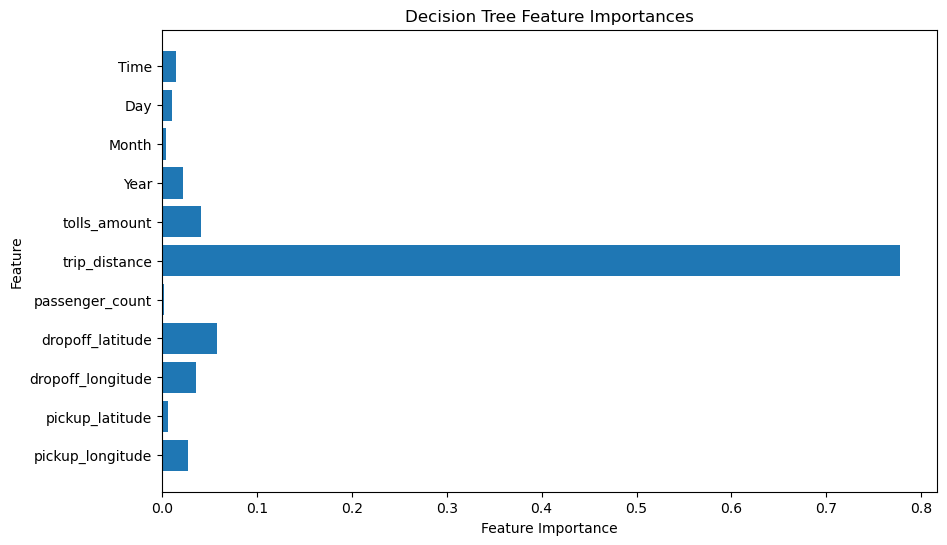

In [67]:
# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(X.columns, DT_feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Decision Tree Feature Importances')
plt.show()

### Random Forest

In [54]:
RDpipeline = Pipeline(
    steps=[
        ("DT", RandomForestRegressor()
        )
    ]
).set_output(transform='pandas')
RDpipeline

Pipeline(steps=[('DT', RandomForestRegressor())])

In [55]:
RDpipeline.fit(X_train, y_train)

Pipeline(steps=[('DT', RandomForestRegressor())])

In [60]:
RDpipeline.score(X_train, y_train), RDpipeline.score(X_test,y_test)

(0.9738475011409965, 0.8292908306840787)

In [57]:
# Predict the target values for the test data
y_pred_RD = RDpipeline.predict(X_test)
y_pred_RD

array([ 8.2031,  8.1847, 11.2665, ..., 11.56  , 21.3098, 15.9209])

In [58]:
# Evaluating the model
rdmse = mean_squared_error(y_test, y_pred_RD)
rdmae = mean_absolute_error(y_test, y_pred_RD)
rdrmse = mean_squared_error(y_test, y_pred_RD, squared=False)
rdr2 = r2_score(y_test, y_pred_RD)

# Store evaluation metrics in a dictionary
RD_evaluation = {
    'Metric': ['Mean Squared Error', 'Mean Absolute Error', 'Root Mean Squared Error', 'R-squared Score'],
    'Value': [rdmse, rdmae, rdrmse, rdr2]
}

C:\Users\bolaj\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [59]:
# Display evaluation metrics in a table
print(tabulate(RD_evaluation, headers='keys', tablefmt='fancy_grid'))

╒═════════════════════════╤═══════════╕
│ Metric                  │     Value │
╞═════════════════════════╪═══════════╡
│ Mean Squared Error      │ 21.8277   │
├─────────────────────────┼───────────┤
│ Mean Absolute Error     │  2.02012  │
├─────────────────────────┼───────────┤
│ Root Mean Squared Error │  4.67201  │
├─────────────────────────┼───────────┤
│ R-squared Score         │  0.829291 │
╘═════════════════════════╧═══════════╛


### Xgboost

In [68]:
XGpipeline = Pipeline(
    steps=[
        ("DT", XGBRegressor()
        )
    ]
).set_output(transform='pandas')
XGpipeline

Pipeline(steps=[('DT',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

In [69]:
XGpipeline.fit(X_train, y_train)

Pipeline(steps=[('DT',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

In [60]:
XGpipeline.score(X_train, y_train), XGpipeline.score(X_test,y_test)

(0.9738475011409965, 0.8292908306840787)

In [70]:
# Predict the target values for the test data
y_pred_xg = XGpipeline.predict(X_test)
y_pred_xg

array([ 8.105482,  8.322428, 11.441914, ..., 11.588664, 21.69264 ,
       14.093793], dtype=float32)

In [72]:
# Evaluating the model
xgmse = mean_squared_error(y_test, y_pred_xg)
xgmae = mean_absolute_error(y_test, y_pred_xg)
xgrmse = mean_squared_error(y_test, y_pred_xg, squared=False)
xgr2 = r2_score(y_test, y_pred_xg)

# Store evaluation metrics in a dictionary
XG_evaluation = {
    'Metric': ['Mean Squared Error', 'Mean Absolute Error', 'Root Mean Squared Error', 'R-squared Score'],
    'Value': [xgmse, xgmae, xgrmse, xgr2]
}

C:\Users\bolaj\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [73]:
# Display evaluation metrics in a table
print(tabulate(XG_evaluation, headers='keys', tablefmt='fancy_grid'))

╒═════════════════════════╤═══════════╕
│ Metric                  │     Value │
╞═════════════════════════╪═══════════╡
│ Mean Squared Error      │ 21.7032   │
├─────────────────────────┼───────────┤
│ Mean Absolute Error     │  2.01137  │
├─────────────────────────┼───────────┤
│ Root Mean Squared Error │  4.65867  │
├─────────────────────────┼───────────┤
│ R-squared Score         │  0.830264 │
╘═════════════════════════╧═══════════╛
